In [20]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [42]:
batch_size=32
img_height=150
img_width=150

In [3]:
os.listdir()

['.ipynb_checkpoints', 'archive', 'img_classification.ipynb']

In [4]:
train_path='archive/seg_train/seg_train'
train = tf.keras.utils.image_dataset_from_directory(
  train_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [5]:
val_path='archive/seg_test/seg_test'
val = tf.keras.utils.image_dataset_from_directory(
  val_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [6]:
label_to_class_name=dict(zip(range(len(train.class_names)),train.class_names))
label_to_class_name

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

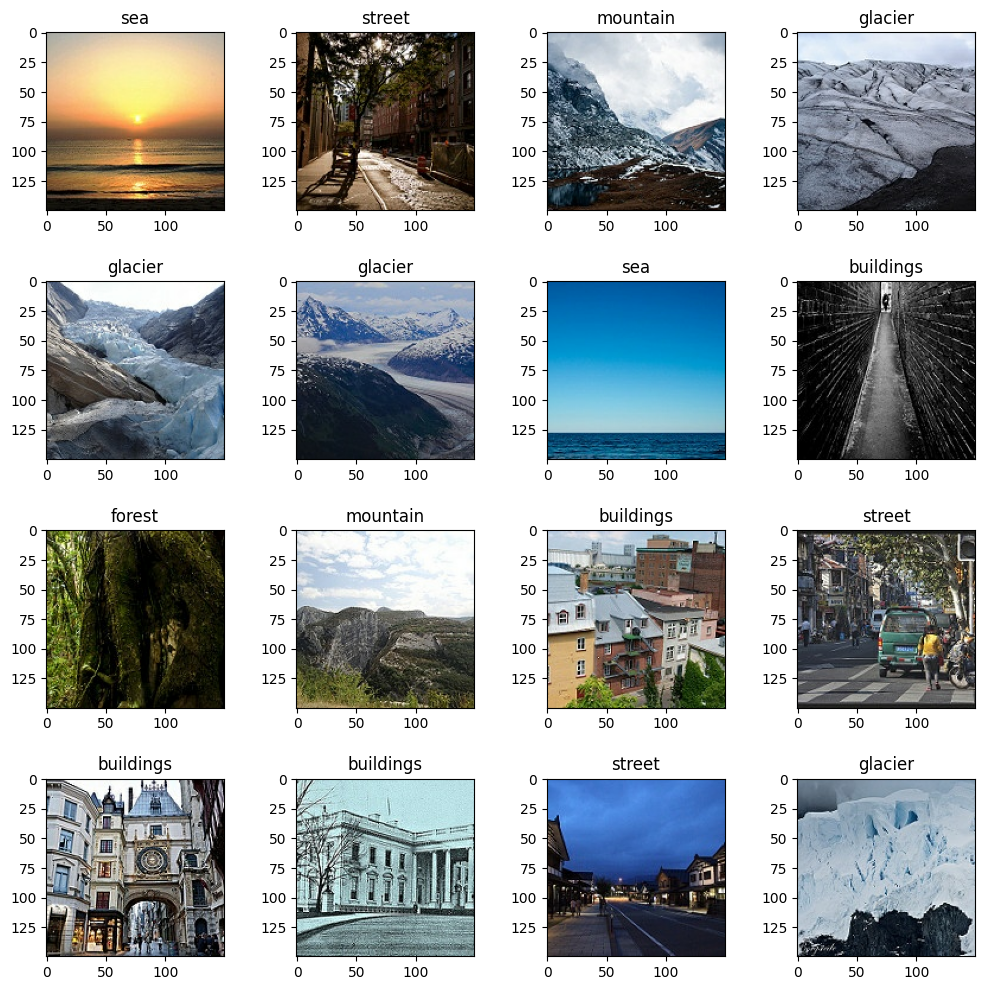

In [7]:
data_iterator=train.as_numpy_iterator()
batch=data_iterator.next()
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(12, 12))
for i in range(4):
    for j in range(4):
        index=i*4+j
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

In [8]:
for image_batch, label_batch in train:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 150, 150, 3)
(32,)


In [9]:
for image_batch, label_batch in val:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 150, 150, 3)
(32,)


In [10]:
#normalization
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [11]:
Autotune=tf.data.AUTOTUNE
train=train.cache().prefetch(buffer_size=Autotune)
val=val.cache().prefetch(buffer_size=Autotune)

CNN

In [15]:
model=tf.keras.Sequential(
    [
       Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
       MaxPooling2D(2,2),
       Conv2D(32,(3,3),activation='relu'),
       MaxPooling2D(2,2),
       Flatten(),
       Dense(128,activation=tf.nn.relu),
       Dense(6,activation=tf.nn.softmax) 
    ]
)

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [18]:
epochs=10
history1=model.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/10
439/439 [==============================] - 257s 579ms/step - loss: 0.9303 - accuracy: 0.6386 - val_loss: 0.6966 - val_accuracy: 0.7390
Epoch 2/10
439/439 [==============================] - 228s 520ms/step - loss: 0.5794 - accuracy: 0.7883 - val_loss: 0.6964 - val_accuracy: 0.7423
Epoch 3/10
439/439 [==============================] - 223s 508ms/step - loss: 0.4024 - accuracy: 0.8556 - val_loss: 0.6779 - val_accuracy: 0.7783
Epoch 4/10
439/439 [==============================] - 238s 542ms/step - loss: 0.2568 - accuracy: 0.9116 - val_loss: 0.7994 - val_accuracy: 0.7780
Epoch 5/10
439/439 [==============================] - 233s 530ms/step - loss: 0.1828 - accuracy: 0.9393 - val_loss: 0.8845 - val_accuracy: 0.7687
Epoch 6/10
439/439 [==============================] - 226s 514ms/step - loss: 0.1056 - accuracy: 0.9657 - val_loss: 1.1840 - val_accuracy: 0.7320
Epoch 7/10
439/439 [==============================] - 224s 510ms/step - loss: 0.0739 - accuracy: 0.9783 - val_loss: 1.0906 -

In [25]:
model1=tf.keras.Sequential(
    [
       Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
       MaxPooling2D(2,2),
       Conv2D(64,(3,3),activation='relu'),
       BatchNormalization(), 
       MaxPooling2D(2,2),
       Flatten(),
       Dropout(0.25), 
       Dense(128,activation=tf.nn.relu),
       Dropout(0.25),
       Dense(6,activation=tf.nn.softmax) 
    ]
)

In [29]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                      

In [31]:
model1.fit(train,validation_data=val,epochs=10)

Epoch 1/10
439/439 [==============================] - 360s 813ms/step - loss: 1.3541 - accuracy: 0.6177 - val_loss: 1.0092 - val_accuracy: 0.6383
Epoch 2/10
439/439 [==============================] - 347s 790ms/step - loss: 0.7363 - accuracy: 0.7365 - val_loss: 1.3283 - val_accuracy: 0.5923
Epoch 3/10
439/439 [==============================] - 353s 803ms/step - loss: 0.5719 - accuracy: 0.7871 - val_loss: 0.9144 - val_accuracy: 0.7010
Epoch 4/10
439/439 [==============================] - 367s 836ms/step - loss: 0.4716 - accuracy: 0.8267 - val_loss: 0.9260 - val_accuracy: 0.7380
Epoch 5/10
439/439 [==============================] - 366s 833ms/step - loss: 0.3746 - accuracy: 0.8642 - val_loss: 1.6487 - val_accuracy: 0.6387
Epoch 6/10
439/439 [==============================] - 360s 821ms/step - loss: 0.3174 - accuracy: 0.8910 - val_loss: 1.5139 - val_accuracy: 0.6557
Epoch 7/10
439/439 [==============================] - 355s 809ms/step - loss: 0.2650 - accuracy: 0.9054 - val_loss: 1.8552 -

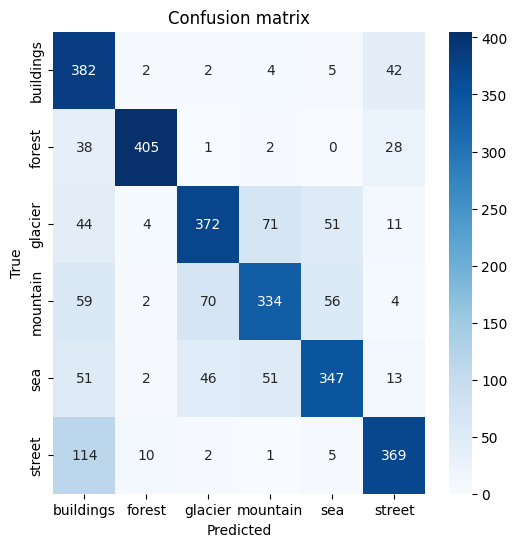

Classification Report:
                precision    recall  f1-score   support

   buildings       0.56      0.87      0.68       437
      forest       0.95      0.85      0.90       474
     glacier       0.75      0.67      0.71       553
    mountain       0.72      0.64      0.68       525
         sea       0.75      0.68      0.71       510
      street       0.79      0.74      0.76       501

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.76      0.74      0.74      3000



In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
true_labels=[]
pred_labels=[]
for images,labels in val:
    true_labels.extend(labels.numpy())
    predictions=model.predict(images,verbose=0)
    pred_labels.extend(np.argmax(predictions,axis=1))
class_names=sorted(os.listdir('archive/seg_test/seg_test'))
conf_mat=confusion_matrix(true_labels,pred_labels)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()
print('Classification Report:\n ', classification_report(true_labels,pred_labels,target_names=class_names))

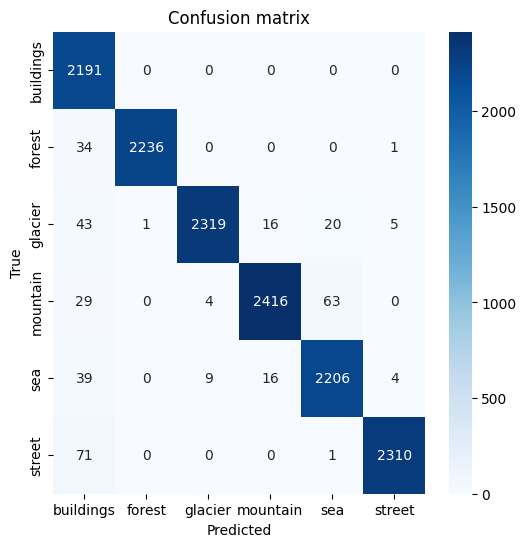

Classification Report:
                precision    recall  f1-score   support

   buildings       0.56      0.87      0.68       437
      forest       0.95      0.85      0.90       474
     glacier       0.75      0.67      0.71       553
    mountain       0.72      0.64      0.68       525
         sea       0.75      0.68      0.71       510
      street       0.79      0.74      0.76       501

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.76      0.74      0.74      3000



In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
true_label=[]
pred_label=[]
for images,labels in train:
    true_label.extend(labels.numpy())
    predictions=model.predict(images,verbose=0)
    pred_label.extend(np.argmax(predictions,axis=1))
class_names=sorted(os.listdir('archive/seg_train/seg_train'))
conf_mat=confusion_matrix(true_label,pred_label)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()
print('Classification Report:\n ', classification_report(true_labels,pred_labels,target_names=class_names))